# Washington houses dataset

### Import the dataset

In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm, shapiro, anderson, kstest
from sklearn import linear_model
%matplotlib inline

# Read the data into Python
df = pd.read_excel('house_data.xlsx')

# Display the data
display(df)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,40000362,2014-05-06,78000.0,2,1.00,780.0,16344.0,1.0,0,0.0,...,5.0,780.0,0.0,1942.0,0,98168.0,47.4739,-122.280,1700.0,10387.0
1,8658300340,2014-05-23,80000.0,1,0.75,430.0,5050.0,1.0,0,0.0,...,4.0,430.0,0.0,1912.0,0,98014.0,47.6499,-121.909,1200.0,7500.0
2,3028200080,2015-03-24,81000.0,2,1.00,730.0,9975.0,1.0,0,0.0,...,5.0,730.0,0.0,1943.0,0,98168.0,47.4808,-122.315,860.0,9000.0
3,3883800011,2014-11-05,82000.0,3,1.00,860.0,10426.0,1.0,0,0.0,...,6.0,860.0,0.0,1954.0,0,98146.0,47.4987,-122.341,1140.0,11250.0
4,1623049041,2014-05-08,82500.0,2,1.00,520.0,22334.0,1.0,0,0.0,...,5.0,520.0,0.0,1951.0,0,98168.0,47.4799,-122.296,1572.0,10570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3365900465,2015-02-19,NaN,3,1.50,1370.0,10176.0,1.0,0,0.0,...,6.0,1370.0,0.0,1947.0,0,98168.0,47.4738,-122.263,1650.0,10176.0
21593,4239400920,2014-09-22,NaN,3,1.00,1090.0,2800.0,1.0,0,0.0,...,6.0,1090.0,0.0,1969.0,0,98092.0,47.3162,-122.183,1040.0,2960.0
21594,4254000060,2014-10-02,NaN,4,2.75,2530.0,17856.0,2.0,0,0.0,...,8.0,2530.0,0.0,1998.0,0,98019.0,47.7356,-121.959,2530.0,14640.0
21595,6450303235,2014-08-18,NaN,3,1.50,1320.0,2625.0,2.0,0,0.0,...,7.0,1320.0,0.0,1986.0,0,98133.0,47.7316,-122.338,1230.0,5250.0


#### Some cleaning

So we can right away see that there is some wrong format in the data. For example, the 'bathrooms' and 'floors' columns have decimal places, when they clearly should be an intger. Before fixing this, let's remove all duplicates and make sure all dates are in the same format.

In [2]:
# Prints 'All good' if all the dates are in the same format
if pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce').notnull().all():
    print('All good')
    
# Remove duplicates
df.drop_duplicates()

All good


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,40000362,2014-05-06,78000.0,2,1.00,780.0,16344.0,1.0,0,0.0,...,5.0,780.0,0.0,1942.0,0,98168.0,47.4739,-122.280,1700.0,10387.0
1,8658300340,2014-05-23,80000.0,1,0.75,430.0,5050.0,1.0,0,0.0,...,4.0,430.0,0.0,1912.0,0,98014.0,47.6499,-121.909,1200.0,7500.0
2,3028200080,2015-03-24,81000.0,2,1.00,730.0,9975.0,1.0,0,0.0,...,5.0,730.0,0.0,1943.0,0,98168.0,47.4808,-122.315,860.0,9000.0
3,3883800011,2014-11-05,82000.0,3,1.00,860.0,10426.0,1.0,0,0.0,...,6.0,860.0,0.0,1954.0,0,98146.0,47.4987,-122.341,1140.0,11250.0
4,1623049041,2014-05-08,82500.0,2,1.00,520.0,22334.0,1.0,0,0.0,...,5.0,520.0,0.0,1951.0,0,98168.0,47.4799,-122.296,1572.0,10570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3365900465,2015-02-19,NaN,3,1.50,1370.0,10176.0,1.0,0,0.0,...,6.0,1370.0,0.0,1947.0,0,98168.0,47.4738,-122.263,1650.0,10176.0
21593,4239400920,2014-09-22,NaN,3,1.00,1090.0,2800.0,1.0,0,0.0,...,6.0,1090.0,0.0,1969.0,0,98092.0,47.3162,-122.183,1040.0,2960.0
21594,4254000060,2014-10-02,NaN,4,2.75,2530.0,17856.0,2.0,0,0.0,...,8.0,2530.0,0.0,1998.0,0,98019.0,47.7356,-121.959,2530.0,14640.0
21595,6450303235,2014-08-18,NaN,3,1.50,1320.0,2625.0,2.0,0,0.0,...,7.0,1320.0,0.0,1986.0,0,98133.0,47.7316,-122.338,1230.0,5250.0


Now we round up the values of the 'bathrooms' and 'floors' variables.

In [3]:
df['bathrooms'].apply(np.ceil, inplace=True)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
21592    2.0
21593    1.0
21594    3.0
21595    2.0
21596    2.0
Name: bathrooms, Length: 21597, dtype: float64

The question we are interested in for this particular analysis is: What are the characteristics of a house that impact its price the most? 

To answer this, we need only a few variables of what was initially provided. A literature review (see Amirhosein Jafari, Reza Akhavian, (2019) "Driving forces for the US residential housing price: a predictive analysis", Built Environment Project and Asset Management, https://doi.org/10.1108/BEPAM-07-2018-0100 and Marija Buriskiene, Vitalija Rutzkiene and Jurate Venckauskaite (2011). Models of factors influencing real state price. Environmental engineering. p. 873-878) suggest that variables related to number of bedrooms, bathrooms, area and location are the most crucial ones. Therefore we drop, albeit momentarily the others. 

In [4]:
df.drop(columns=["id", "date", "floors", "waterfront", "view", 
                "yr_renovated", "lat", "long", "grade", "condition", "sqft_above", "sqft_basement", "sqft_lot"], inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.158800e+04,21597.000000,21596.000000,21587.000000,21591.000000,21590.000000,21590.000000,21589.000000
mean,5.403828e+05,3.374867,2.115843,2080.185343,1970.997545,98077.950023,1986.586336,12761.042058
std,3.674052e+05,0.959233,0.768998,917.968337,29.377081,53.512502,685.295720,27279.086799
min,7.800000e+04,1.000000,0.500000,370.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1951.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1975.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1997.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,40.000000,8.000000,13540.000000,2015.000000,98199.000000,6210.000000,871200.000000


Next we analyze missing values. First let's find out how many are there. 

In [5]:
print("Missing values price variable: ", df['price'].isnull().sum())
print("Missing values bedrooms variable: ", df['bedrooms'].isnull().sum())
print("Missing values bathrooms variable: ", df['bathrooms'].isnull().sum())
print("Missing values sqft_living variable: ", df['sqft_living'].isnull().sum())
print("Missing values yr_built variable: ", df['yr_built'].isnull().sum())
print("Missing values zipcode variable: ", df['zipcode'].isnull().sum())
print("Missing values sqft_living15 variable: ", df['sqft_living15'].isnull().sum())
print("Missing values sqft_lot15 variable: ", df['sqft_lot15'].isnull().sum())

Missing values price variable:  9
Missing values bedrooms variable:  0
Missing values bathrooms variable:  1
Missing values sqft_living variable:  10
Missing values yr_built variable:  6
Missing values zipcode variable:  7
Missing values sqft_living15 variable:  7
Missing values sqft_lot15 variable:  8


We see that, when compared to the 21598 total values, the missing values are under 1% and can be replaced by the median.

In [6]:
df['price'].replace(np.nan, df['price'].median(), inplace=True)
df['bedrooms'].replace(np.nan, df['price'].median(), inplace=True)
df['bathrooms'].replace(np.nan, df['sqft_living15'].median(), inplace=True)
df['sqft_living'].replace(np.nan, df['sqft_lot15'].median(), inplace=True)
df['yr_built'].replace(np.nan, df['price'].median(), inplace=True)
df['zipcode'].replace(np.nan, df['sqft_living15'].median(), inplace=True)
df['sqft_living15'].replace(np.nan, df['sqft_living15'].median(), inplace=True)
df['sqft_lot15'].replace(np.nan, df['sqft_lot15'].median(), inplace=True)

### Exploratory analysis

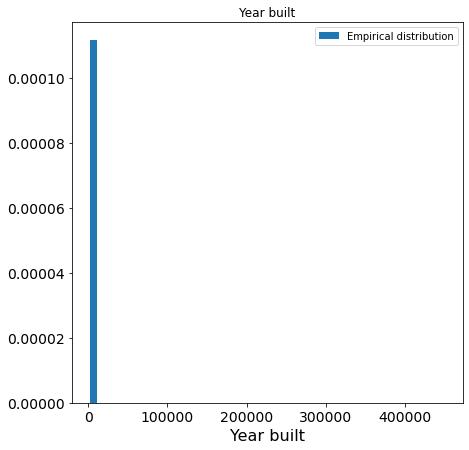

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.hist(x=df['yr_built'], bins=50, density=True, label='Empirical distribution')
axs.legend()
axs.set_xlabel('Year built', fontsize=16)
axs.set_title('Year built')
axs.tick_params(labelsize=14)

Now for some exploratory analysis.

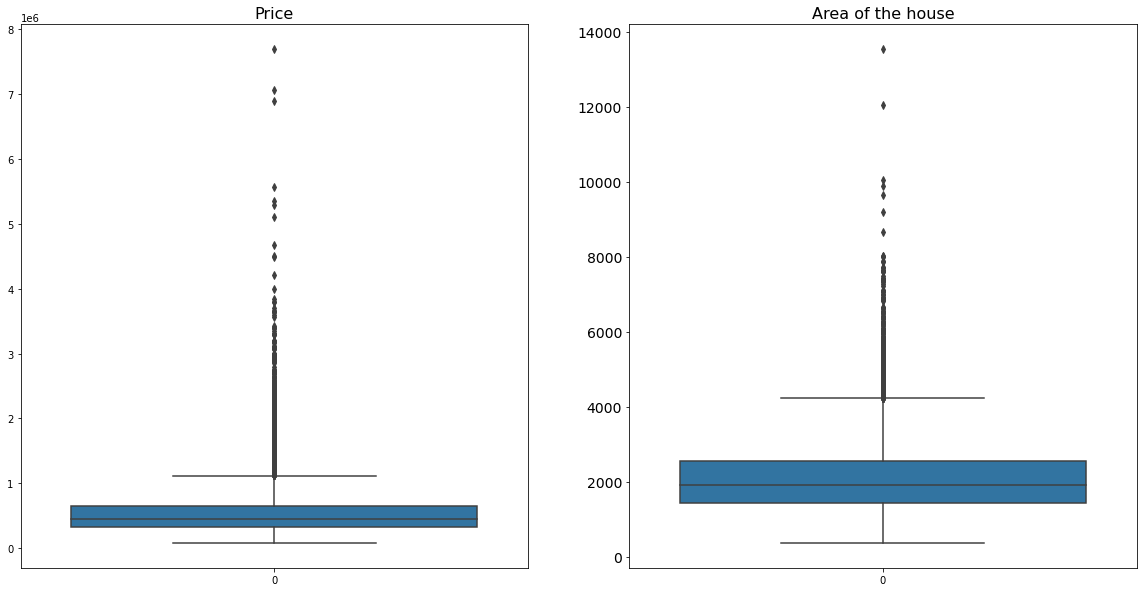

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df['price'], ax=axs[0])
sns.boxplot(data=df['sqft_living'], ax=axs[1])
axs[0].set_title("Price", fontsize=16)
axs[1].set_title("Area of the house", fontsize=16)
plt.tick_params(axis='y', labelsize=14)

By the looks of it, the price and are variables are both rightly skewed, and far from normality. Let's investigate this further.

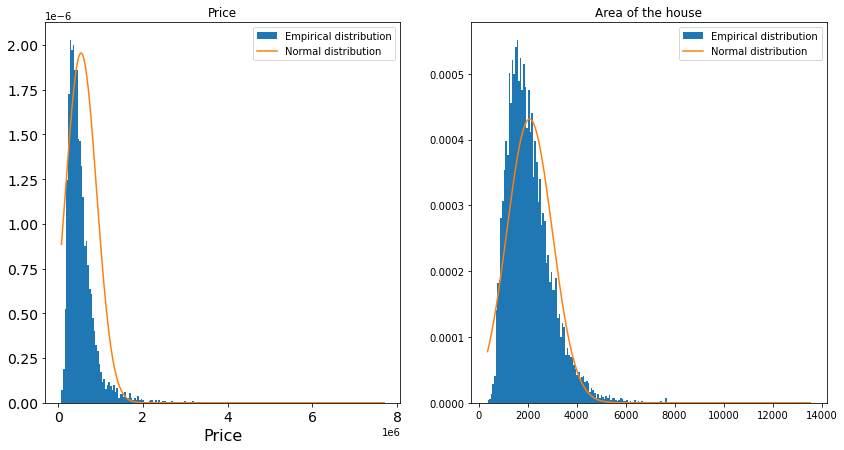

In [14]:
x0 = np.arange(df['price'].min(),df['price'].max(), 2)
x1 = np.arange(df['sqft_living'].min(),df['sqft_living'].max(), 2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
axs[0].hist(x=df['price'], bins=200, density=True, label='Empirical distribution')
axs[0].plot(x0, 1.8*norm.pdf(x0, df['price'].mean(), df['price'].std()), label='Normal distribution')
axs[0].legend()
axs[0].set_xlabel('Price', fontsize=16)
axs[0].set_title('Price')
axs[0].tick_params(labelsize=14)

axs[1].hist(x=df['sqft_living'], bins=200, density=True, label='Empirical distribution')
axs[1].plot(x1, norm.pdf(x1, df['sqft_living'].mean(), df['sqft_living'].std()), label='Normal distribution')
axs[1].legend()
axs[1].set_title('Area of the house')

plt.show()

Looks like the price variable is very far from normality, but not so the area variable. Let's check this further.

### Normality tests

<Figure size 504x504 with 0 Axes>

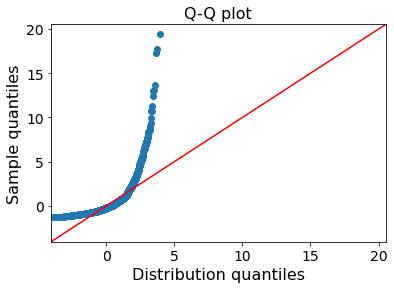

In [15]:
std_price = (df['price'] - df['price'].mean()) / df['price'].std()

fig = plt.figure(figsize=(7,7))
sm.qqplot(data=std_price, line ='45')
plt.xlabel('Distribution quantiles', fontsize=16)
plt.ylabel('Sample quantiles', fontsize=16)
plt.title ('Q-Q plot', fontsize=16)
plt.tick_params(labelsize=14)
plt.savefig('qq_price.jpg')
plt.show()

<Figure size 504x504 with 0 Axes>

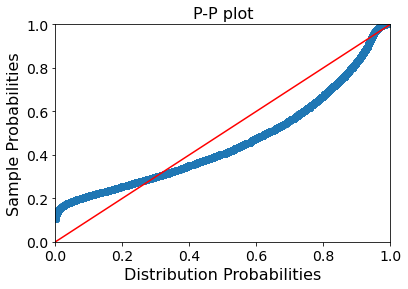

In [16]:
fig = plt.figure(figsize=(7,7))
pplot = sm.ProbPlot(std_price).ppplot(line='45')
plt.title('P-P plot', fontsize=16)
plt.xlabel('Distribution Probabilities', fontsize=16)
plt.ylabel('Sample Probabilities', fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [17]:
price_skew = df['price'].skew()
price_kurt = df['price'].kurtosis()
print(f'Price variable skewness is: {price_skew}')
print(f'Price variable kurtosis is: {price_kurt}') 

Price variable skewness is: 4.024309960669534
Price variable kurtosis is: 34.55330814843405


In [18]:
shapiro(df['price'].to_numpy())

C:\Users\migue\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7116794586181641, pvalue=0.0)

In [19]:
anderson(df['price'].to_numpy(), dist='norm')

AndersonResult(statistic=1194.3888475638378, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [20]:
kstest(std_price, norm.cdf)

KstestResult(statistic=0.14596448956550412, pvalue=0.0)

As expected, the price variable is far from normal. Let's now check the area of the house.

<Figure size 504x504 with 0 Axes>

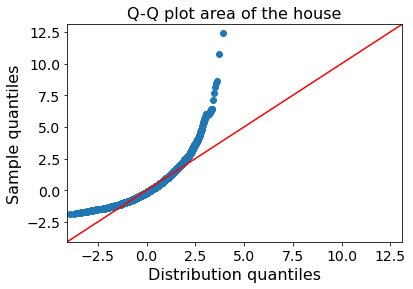

In [24]:
std_area = (df['sqft_living'] - df['sqft_living'].mean()) / df['sqft_living'].std()

fig = plt.figure(figsize=(7,7))
sm.qqplot(data=std_area, line ='45')
plt.xlabel('Distribution quantiles', fontsize=16)
plt.ylabel('Sample quantiles', fontsize=16)
plt.title ('Q-Q plot area of the house', fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

<Figure size 504x504 with 0 Axes>

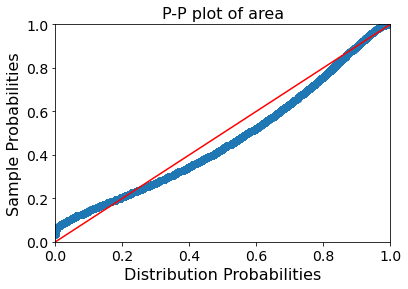

In [25]:
fig = plt.figure(figsize=(7,7))
pplot = sm.ProbPlot(std_area).ppplot(line='45')
plt.title('P-P plot of area', fontsize=16)
plt.xlabel('Distribution Probabilities', fontsize=16)
plt.ylabel('Sample Probabilities', fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [27]:
area_skew = df['sqft_living'].skew()
area_kurt = df['sqft_living'].kurtosis()
print(f'Total area variable skewness is: {area_skew}')
print(f'Total area variable kurtosis is: {area_kurt}') 

shapiro(df['sqft_living'].to_numpy())

Total area variable skewness is: 1.5276116572295029
Total area variable kurtosis is: 5.563430151052014


C:\Users\migue\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9104675650596619, pvalue=0.0)

In [28]:
anderson(df['sqft_living'].to_numpy(), dist='norm')

AndersonResult(statistic=336.35298408174276, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [29]:
kstest(std_area, norm.cdf)

KstestResult(statistic=0.0797241440757428, pvalue=7.579246739415112e-120)

### Z-value questions

Now, when talking about the 10% priciest houses, what year where they built in and in what location are they?

Text(0.5, 1.0, 'Location of 10% priciest houses')

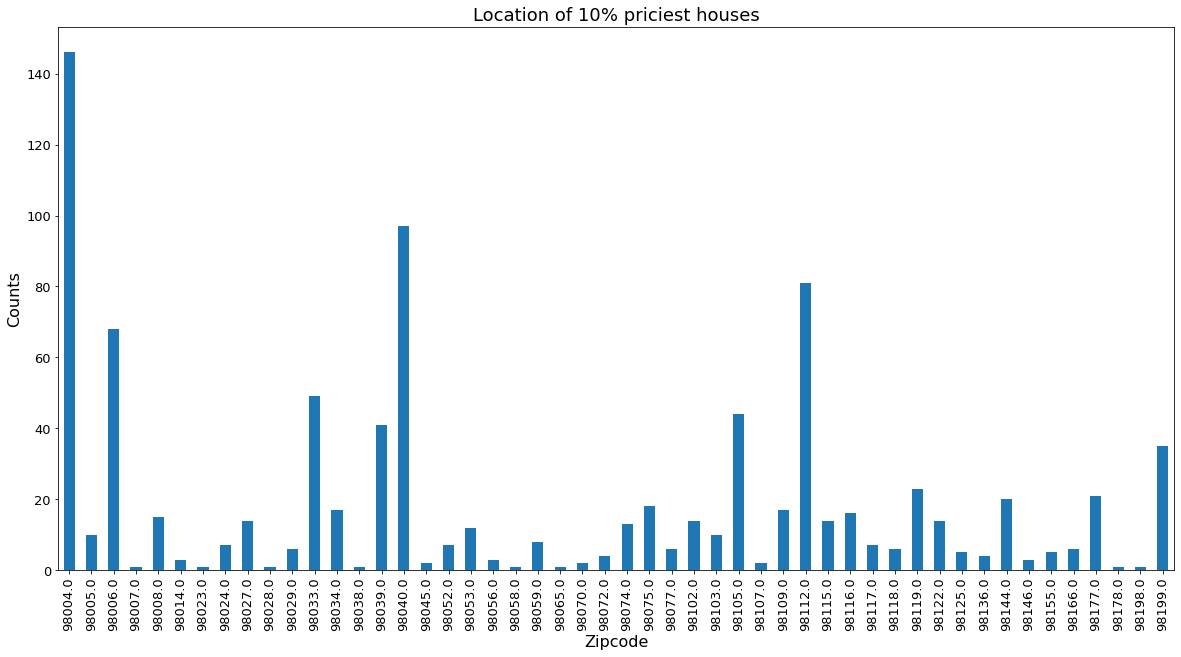

In [35]:
pricey = df[df['price'] >= 1245801].pivot_table(columns='zipcode', aggfunc='size')

fig, ax = plt.subplots(figsize=(20,10))
pricey.plot(kind='bar')
ax.tick_params(labelsize=13, which='major')
ax.set_xlabel('Zipcode', fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Location of 10% priciest houses', fontsize=18)

So we can see that the highest count, zipcode 98004, corresponds to Belviu, Washington, which is right next to Seattle. Second highest count, zipcode 98040, is Mercer Islands, again right next to Seattle. And all zipcodes starting by 981 are in Seattle. So we see that the 10 % priciest houses in the data set are located mostly in the Seattle area, indicating a clear relation between location and price.

Let's now take a look at the age. What age are the 10% priciest houses?

Text(0.5, 1.0, 'Age of 10% priciest houses')

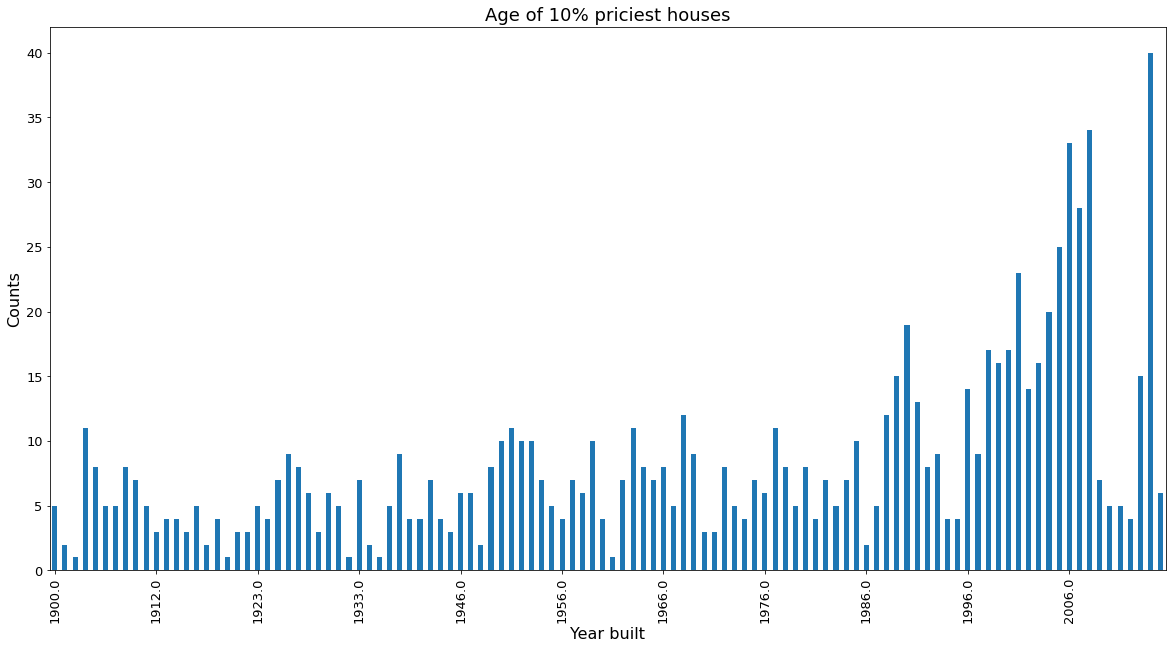

In [36]:
major = MultipleLocator(10)

age = df[df['price'] >= 1245801].pivot_table(columns='yr_built', aggfunc='size')

fig, ax = plt.subplots(figsize=(20,10))
age.plot(kind='bar')
ax.tick_params(labelsize=13, which='major')
ax.xaxis.set_major_locator(major)
ax.set_xlabel('Year built', fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Age of 10% priciest houses', fontsize=18)

The priciest houses are relatively recent, the majority of the houses are less than 15 years old. This, again, is in accordance with the findings of other researchers.

### Correlations

Let us investigate now the relation between the area of the house and its price. Let's use a scatter plot for that. 

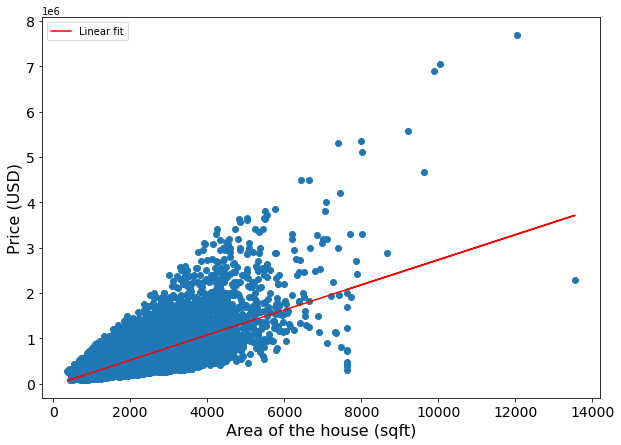

Fit score: 0.4858761429784717


In [40]:
lm = linear_model.LinearRegression()
X = np.array(df['sqft_living']).reshape((-1, 1))
reg = lm.fit(X, df['price'])


fig = plt.figure(figsize=(10,7))
plt.scatter(x=df['sqft_living'], y=df['price'])
plt.plot(df['sqft_living'], (reg.intercept_ + reg.coef_*df['sqft_living']), color='r', label='Linear fit')
plt.xlabel('Area of the house (sqft)', fontsize=16)
plt.ylabel('Price (USD)', fontsize=16)
plt.tick_params(labelsize=14)
plt.legend()
plt.show()

print(f"Fit score: {reg.score(X, df['price'])}")

There clearly is a relationship, but is not as strong as one might expect. Only about a 49% percent of the variance of the price variable can be explained by changes of the area variable.

Now we check a linear model with the zipcode. First, we create dummy variables for the zipcode variable.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


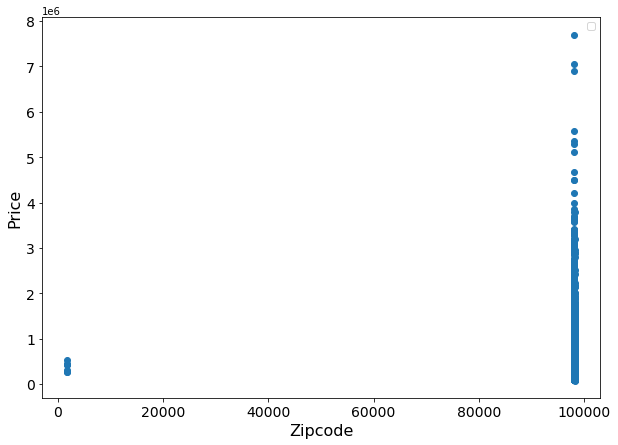

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-7.419045e+16,2644.50,-2.805459e+13,0.0,0.41,0.41,-7.419045e+16,-7.419045e+16
1,1840.0,7.419045e+16,105613.43,7.024718e+11,0.0,0.41,0.41,7.419045e+16,7.419045e+16
2,98001.0,7.419045e+16,14938.01,4.966555e+12,0.0,0.41,0.41,7.419045e+16,7.419045e+16
3,98002.0,7.419045e+16,19977.64,3.713675e+12,0.0,0.41,0.41,7.419045e+16,7.419045e+16
4,98003.0,7.419045e+16,16931.40,4.381826e+12,0.0,0.41,0.41,7.419045e+16,7.419045e+16
...,...,...,...,...,...,...,...,...,...
67,98177.0,7.419045e+16,17691.67,4.193525e+12,0.0,0.41,0.41,7.419045e+16,7.419045e+16
68,98178.0,7.419045e+16,17459.08,4.249391e+12,0.0,0.41,0.41,7.419045e+16,7.419045e+16
69,98188.0,7.419045e+16,24186.70,3.067407e+12,0.0,0.41,0.41,7.419045e+16,7.419045e+16
70,98198.0,7.419045e+16,16901.88,4.389480e+12,0.0,0.41,0.41,7.419045e+16,7.419045e+16


In [41]:
dummy = pd.get_dummies(df['zipcode'])

lm = pg.linear_regression(dummy, df['price'], remove_na=True)



fig = plt.figure(figsize=(10,7))
plt.scatter(x=df['zipcode'], y=df['price'])
plt.xlabel('Zipcode', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.tick_params(labelsize=14)
plt.legend()
plt.savefig('scat_price_zipcode.jpg')
plt.show()

lm.round(2)

Once again, there is a relation between the location and the price of a house, but is not very strong. This, however, seem to be good predictors of the price.